In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\Abhi'

In [3]:
os.chdir('C:\\Users\\Abhi\\documents\\readings')

In [4]:
df=pd.read_csv('Superstore_data.csv',encoding='unicode_escape')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [10]:
df.duplicated(keep=False).sum()

0

# EDA : Customer Analysis
### Customer Segmentation

In [10]:
# types of customers
type_of_customers=df['Segment'].unique()
type_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
noc=df['Segment'].value_counts().reset_index()
noc

,Segment,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [12]:
noc=noc.rename(columns={'Segment':'CustomerTypes'})
noc

,CustomerTypes,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


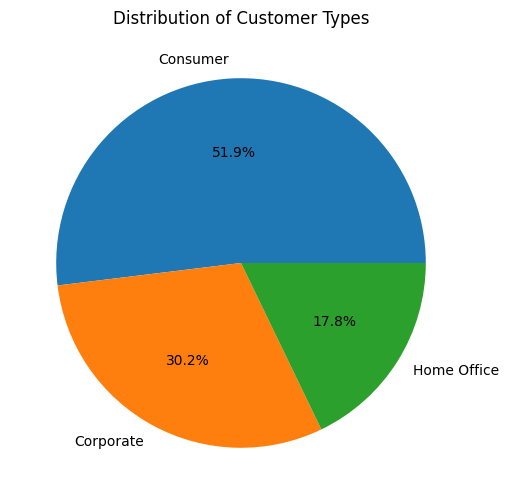

In [13]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Customer Types')
plt.pie(noc['count'],labels =noc['CustomerTypes'],autopct='%1.1f%%')
plt.show()

In [14]:
# Cusotmrs and sales
spc=df.groupby('Segment')['Sales'].sum().reset_index()
spc=spc.rename(columns={'Segment':'CustomerTypes','Sales':'Total Sales'})
spc

,CustomerTypes,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


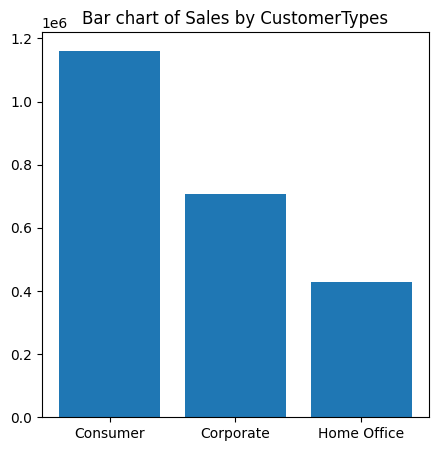

In [15]:
plt.figure(figsize=(5,5))
plt.title('Bar chart of Sales by CustomerTypes')
plt.bar(spc['CustomerTypes'],spc['Total Sales'])
plt.xlabel=('CustomerTypes')
plt.ylabel=('Total Sales')
plt.show()

# Customers Loyality

In [16]:
# group data accourding to customer id,segment and calcualte freq of the orders 
cof=df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
# rename the orderid column
cof.rename(columns={'Order ID':'Total Orders'},inplace=True)

# identify repeat customers 
repeat_cus=cof[cof['Total Orders']>=1]

# sorted repeat customers in descending orders
sorted_rc=repeat_cus.sort_values(by='Total Orders',ascending =False)
print(sorted_rc.head(10).reset_index())

   index Customer ID        Customer Name      Segment  Total Orders
0    787    WB-21850        William Brown     Consumer            37
1    606    PP-18955           Paul Prost  Home Office            34
2    387    JL-15835             John Lee     Consumer            34
3    482    MA-17560         Matt Abelman  Home Office            34
4    720    SV-20365          Seth Vernon     Consumer            32
5    349    JD-15895     Jonathan Doherty    Corporate            32
6    147    CK-12205  Chloris Kastensmidt     Consumer            32
7    257    EH-13765         Edward Hooks    Corporate            32
8    275    EP-13915           Emily Phan     Consumer            31
9    791    ZC-21910     Zuschuss Carroll     Consumer            31


# Ranking customers by sales

In [17]:
# group data based on : customer id ,customer name and sales
customer_sales =df.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index()

# sort in descending order
top_buyer =customer_sales.sort_values(by='Sales',ascending =False)

#print the output
print(top_buyer.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Sales
0    SM-20320         Sean Miller  25043.050
1    TC-20980        Tamara Chand  19052.218
2    RB-19360        Raymond Buch  15117.339
3    TA-21385        Tom Ashbrook  14595.620
4    AB-10105       Adrian Barton  14473.571
5    KL-16645        Ken Lonsdale  14175.229
6    SC-20095        Sanjit Chand  14142.334
7    HL-15040        Hunter Lopez  12873.298
8    SE-20110        Sanjit Engle  12209.438
9    CC-12370  Christopher Conant  12129.072


# Analysis of Shipping Method

In [18]:
tosm =df['Ship Mode'].unique()
tosm

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [19]:
# frequency use of shipping methods
shipping_mode =df['Ship Mode'].value_counts().reset_index()
shipping_mode =shipping_mode.rename(columns={'index':'Mode of shippment','count':'frequency'})
shipping_mode

,Ship Mode,frequency
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


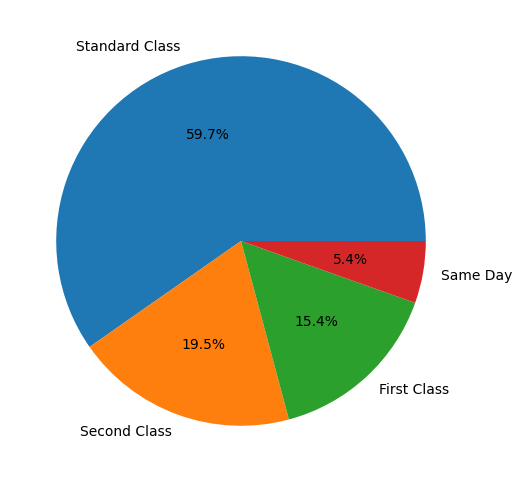

In [20]:
# plot a pie chart of ship mode
plt.figure(figsize=(6,6))
plt.title=('Popular Shipping Mode')
plt.pie(shipping_mode['frequency'],labels=shipping_mode['Ship Mode'],autopct='%1.1f%%')
plt.show()

# Graphical Analysis

In [21]:
# customers by states
state =df['State'].value_counts().reset_index()
state =state.rename(columns={'index':'State','count':'No of customers'})
state.head(10)

,State,No of customers
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [22]:
# customers by city
city =df['City'].value_counts().reset_index()
city =city.rename(columns={'index':'City','count':'Number of Customers'})
city.head(10)

,City,Number of Customers
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
5,Houston,377
6,Chicago,314
7,Columbus,222
8,San Diego,170
9,Springfield,163


In [23]:
# Sales per state
sale_state =df.groupby(['State'])['Sales'].sum().reset_index()

# grouping state by sales
top_state_sales=sale_state.sort_values(by='Sales',ascending=False)

print(top_state_sales.head(5).reset_index(drop=True))

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140


# Prpduct Category Segmentation

In [24]:
# types of products
p_cat=df['Category'].value_counts()
p_cat 

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [25]:
# group data by product category
subcategory_count=df.groupby('Category')['Sub-Category'].nunique().reset_index()

# sort by ascending order
subcategory_count =subcategory_count.sort_values(by='Sub-Category',ascending=False)
print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [26]:
# sales by each category
cat_sales=df.groupby(['Category'])['Sales'].sum().reset_index()
cat_sales

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


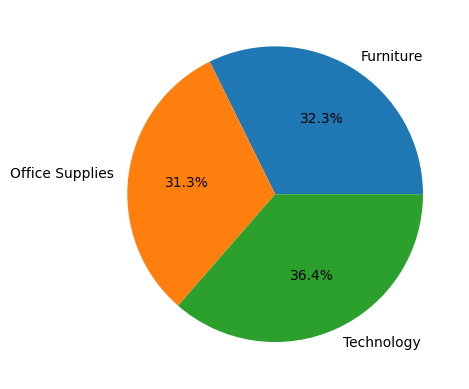

In [71]:
# plotting a pie chart
plt.title=('Top product category based on sales')
plt.pie(cat_sales['Sales'],labels=cat_sales['Category'],autopct='%1.1f%%')
plt.show()

In [27]:
# group data by product sub-category vs sales
p_sub=df.groupby('Sub-Category')['Sales'].sum().reset_index()

# sorting in descending order
top_p_sub=p_sub.sort_values(by='Sales',ascending=False)

top_p_sub.reset_index(drop=True)

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


TypeError: 'str' object is not callable

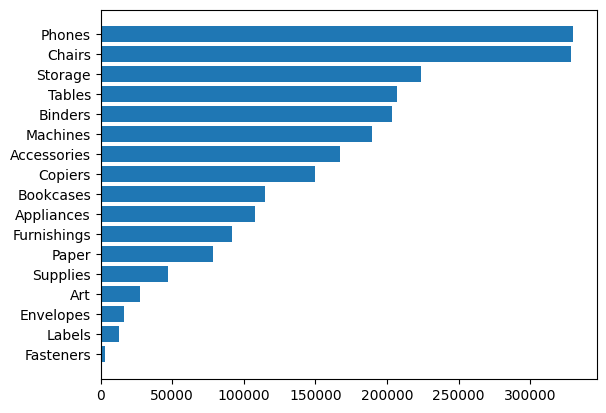

In [29]:
top_p_sub=top_p_sub.sort_values(by='Sales',ascending=True)

# plotting a pie chart
plt.barh(top_p_sub['Sub-Category'],top_p_sub['Sales'])
plt.title('Top product Sub-Categories based on Sales')
plt.xlabel('Prodect Sub-categories')
plt.ylabel('Total Sales')
plt.show()

# Sales Trend Analysis

In [38]:
# convert order date to datetime format
df['Order Date']=pd.to_datetime(df['Order Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [39]:
# grouping by year and suming the sales per year
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum()

# setting new indexes and remaining the columns
yearly_sales =yearly_sales.reset_index()
yearly_sales =yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


TypeError: 'str' object is not callable

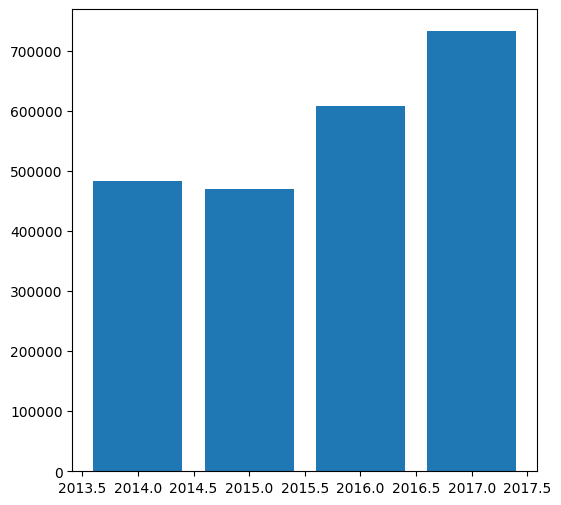

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()

TypeError: 'str' object is not callable

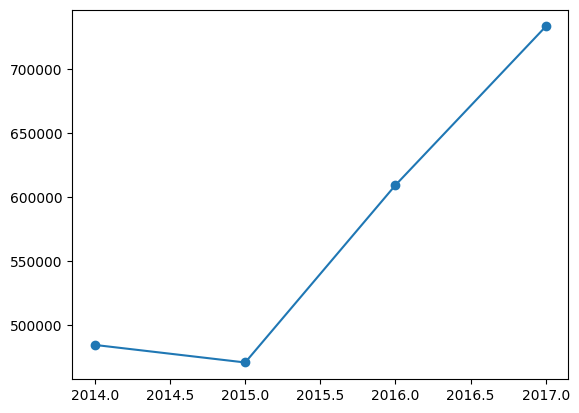

In [41]:
# plot a line graph
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'],marker='o',linestyle='-')
plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()

# Quartely Sales

In [43]:
# convert order date to datetime format
df['Order Date'] =pd.to_datetime(df['Order Date'])

# filter data according to year
quartely_sales =df[df['Order Date'].dt.year == 2016]

# calculate data quartely sales for year 2018

quartely_sales =quartely_sales.resample('Q',on='Order Date')['Sales'].sum()
quartely_sales =quartely_sales.reset_index()
quartely_sales =quartely_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print(quartely_sales)

     Quarter  Total Sales
0 2016-03-31   93237.1810
1 2016-06-30  136082.3010
2 2016-09-30  143787.3622
3 2016-12-31  236098.7538


TypeError: 'str' object is not callable

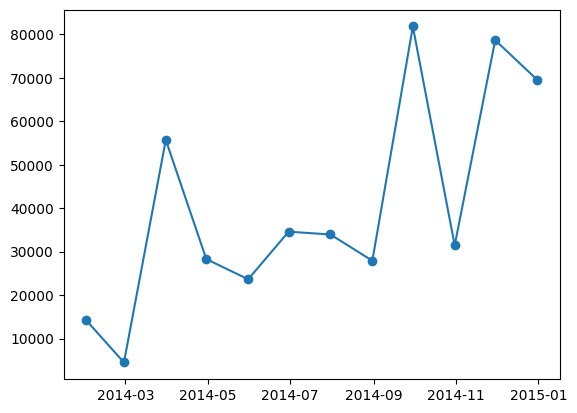

In [50]:
import matplotlib.pyplot as plt

# Assuming monthly_sales contains the data you calculated earlier

plt.plot(monthly_sales['Month'], monthly_sales['Total Sales by Month'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()


# Monthly sales

In [49]:
import pandas as pd

# Assuming df is your DataFrame containing sales data

# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data according to year
yearly_sales = df[df['Order Date'].dt.year == 2014]

# Calculate monthly sales for the year 2014
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Sales by Month'})

print(monthly_sales)


        Month  Total Sales by Month
0  2014-01-31            14236.8950
1  2014-02-28             4519.8920
2  2014-03-31            55691.0090
3  2014-04-30            28295.3450
4  2014-05-31            23648.2870
5  2014-06-30            34595.1276
6  2014-07-31            33946.3930
7  2014-08-31            27909.4685
8  2014-09-30            81777.3508
9  2014-10-31            31453.3930
10 2014-11-30            78628.7167
11 2014-12-31            69545.6205
